# 0.) Import and Clean data

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [65]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [66]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
X = df.drop('country', axis=1)

In [68]:
names = df['country']

In [69]:
scaler = StandardScaler().fit(X)

In [70]:
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [71]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X_scaled)

/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

# 2.) Pick two features to visualize across

In [72]:
X.columns
#This is the columns of the data frame. The index of the columns is the same as the index of the centroids

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

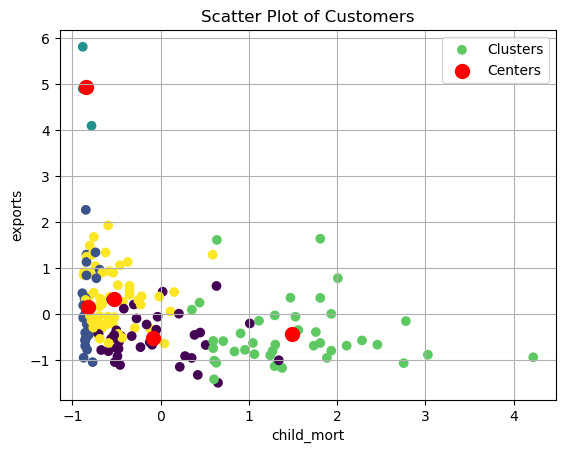

In [73]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='red', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [74]:
WCSSs = []
Ks = range(1, 15)

In [75]:
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=30, init='random')
    #n_init is the number of times the k-means algorithm will run with different centroid seeds.
    #The final results will be the best output of n_init consecutive runs in terms of inertia.
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)
    #.inertia_ is the sum of squared distances of samples to their closest cluster center.

In [76]:
WCCSs = [KMeans(n_clusters=k, random_state=123).fit(X_scaled).inertia_ for k in Ks]

/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luisj/anacond

In [77]:
WCSSs
#If you add a new centrum there would be a new cluster and the WCSS would decrease
#if the sequence have one bigger value, this would mean that the we didnt try enough n_init times

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.5205369722204,
 631.3877859960571,
 565.7419222329098,
 524.4166897113464,
 464.1853242279304,
 437.36375854729533,
 411.29761931375623,
 381.9069290193281,
 349.24450605777804,
 339.7437940523117,
 324.9034603757209]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

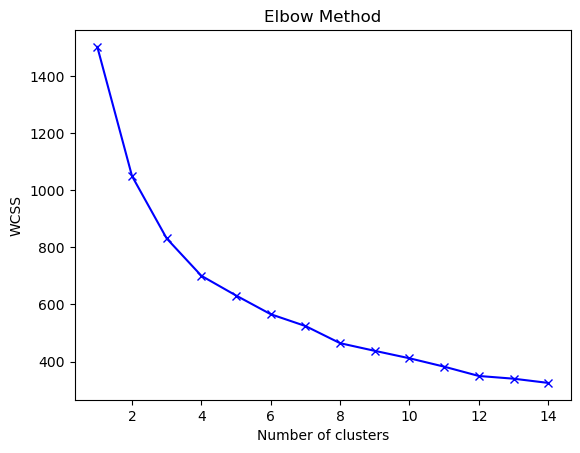

In [78]:
plt.plot(Ks, WCSSs, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 6.) Do the same for a silhoutte plot

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
# Silhouette score
SCs = []
Ks = range(2, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=30, init='random')
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))

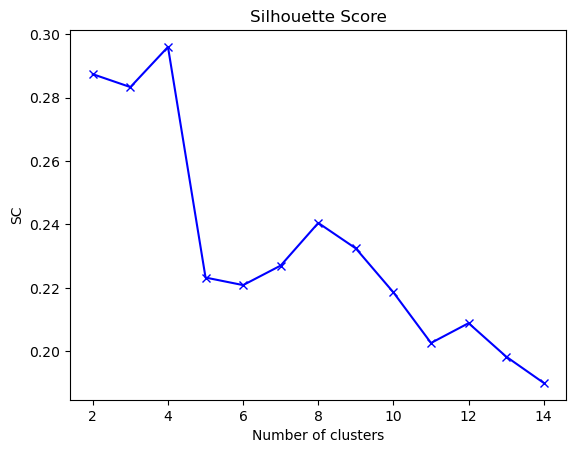

In [81]:
plt.plot(Ks, SCs, 'bx-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SC')
plt.show()

We see an updown. there is a kink every often.

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [86]:
#We use 2 clusters because we want to separate between developed and developing countries
kmeans = KMeans(n_clusters=2, random_state=123, n_init=30, init='random').fit(X_scaled)

In [87]:
preds = pd.DataFrame(kmeans.predict(X_scaled), columns=['Cluster'])

In [88]:
output = pd.concat([preds, df], axis=1)

In [89]:
output

,Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [90]:
print("Cluster 1: ", output[output['Cluster'] == 0]['country'].values)

Cluster 1:  ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Canada' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Fiji' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland'
 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Moldova'
 'Montenegro' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Singapore' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'S

In [91]:
print("Cluster 2: ", output[output['Cluster'] == 1]['country'].values)

Cluster 2:  ['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq'
 'Kenya' 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Micronesia, Fed. Sts.'
 'Mongolia' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Philippines' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Tonga' 'Turkmenistan' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen' 'Zambia']


In [92]:
#List of countries that are in each cluster.
clustered = pd.DataFrame(names)
clustered['Cluster'] = kmeans.labels_
clustered.sort_values('Cluster')
clustered

,country,Cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,1
163,Venezuela,0
164,Vietnam,0
165,Yemen,1


In [93]:
#### Write an observation


# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [100]:
output

,Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [103]:
#Kmens have results on scaled data, so we would have to uncaled our data. Thats why we use output
output.drop('country', axis=1).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


# 9.) Write an observation about the descriptive statistics.